In [60]:
import math
import numpy as np
import pandas as pd
import os
import tempfile

from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
orderdf = pd.read_csv('ignored_assets/orders.csv', parse_dates = [6])

In [77]:
# Create map of driver IDs
driver_ids=orderdf['driver_id'].unique()

# create map of core stations
core_stations = orderdf['start_district_hash'].unique()

In [78]:
#Index stuff
orderdf_f=orderdf[(~pd.isnull(orderdf['driver_id'])) & orderdf['dest_district_hash'].isin(core_stations)]
myindex=pd.MultiIndex.from_arrays([orderdf_f['driver_id'],orderdf_f['timestamp']],names=('driver_id','timestamp'))

orderdf2=orderdf_f.set_index(myindex)
orderdf_s=orderdf2.sort_index()

%time orderdf_s.loc[driver_ids[0]]

CPU times: user 26.5 ms, sys: 5.63 ms, total: 32.1 ms
Wall time: 40.8 ms


,order_id,driver_id,passenger_id,start_district_hash,dest_district_hash,price,timestamp,hour,dayofweek,driver_cluster,expected_travel_time
timestamp,,,,,,,,,,,
2016-01-01 09:22:58,236c00d175a2295ade03ab6ea4b9689a,dd65fa250fca2833a3a8c16d2cf0457c,ce27cf85aaa48764f650414d71f3674e,62afaf3288e236b389af9cfdc5206415,62afaf3288e236b389af9cfdc5206415,6.0,2016-01-01 09:22:58,9,4,1.0,2.799474
2016-01-01 09:35:26,a741062b69f6f1828d69a3f771aab6d5,dd65fa250fca2833a3a8c16d2cf0457c,1dc3e244fdef29a3299722f9aa26720f,62afaf3288e236b389af9cfdc5206415,62afaf3288e236b389af9cfdc5206415,6.0,2016-01-01 09:35:26,9,4,1.0,2.799474
2016-01-01 09:43:39,c88282a71e988c5fb7eb11e33d5ca512,dd65fa250fca2833a3a8c16d2cf0457c,adbd59353c4651fc77405876d9e92638,62afaf3288e236b389af9cfdc5206415,d4ec2125aff74eded207d2d915ef682f,11.0,2016-01-01 09:43:39,9,4,1.0,5.132369
2016-01-01 10:02:40,8fd177882b51161c854dbd1745a54c0c,dd65fa250fca2833a3a8c16d2cf0457c,2cf11c2f409e7c4503e0b47c6f7d2ba9,d4ec2125aff74eded207d2d915ef682f,4f4041f7db0c7f69892d9b74c1a7efa1,41.0,2016-01-01 10:02:40,10,4,1.0,19.129739
2016-01-01 10:04:50,a174cc46d34b2b73bbb9b94a6d022b80,dd65fa250fca2833a3a8c16d2cf0457c,5d8886092bbb717e0ccf37cb2d7a9661,d4ec2125aff74eded207d2d915ef682f,d4ec2125aff74eded207d2d915ef682f,9.7,2016-01-01 10:04:50,10,4,1.0,4.525816
2016-01-01 10:28:18,80559050428f704e024376a9d7306db9,dd65fa250fca2833a3a8c16d2cf0457c,4c5946a01d3764886040ba18fac717d6,d4ec2125aff74eded207d2d915ef682f,929ec6c160e6f52c20a4217c7978f681,11.0,2016-01-01 10:28:18,10,4,1.0,5.132369
2016-01-01 10:30:13,5e03c747494657155b21320fa49144a9,dd65fa250fca2833a3a8c16d2cf0457c,da8ccb4ff0f510e46bb4643b8a785242,d4ec2125aff74eded207d2d915ef682f,929ec6c160e6f52c20a4217c7978f681,26.0,2016-01-01 10:30:13,10,4,1.0,12.131054
2016-01-01 13:37:23,97ebd0c6680f7c0535dbfdead6e51b4b,dd65fa250fca2833a3a8c16d2cf0457c,ed180d7daf639d936f1aeae4f7fb482f,4725c39a5e5f4c188d382da3910b3f3f,3e12208dd0be281c92a6ab57d9a6fb32,24.0,2016-01-01 13:37:23,13,4,1.0,11.197896
2016-01-01 14:10:40,d48bb6f68f10e71c358347f8d4014705,dd65fa250fca2833a3a8c16d2cf0457c,88505970b8a7039e07575480c221386d,3e12208dd0be281c92a6ab57d9a6fb32,38d5ad2d22b61109fd8e7b43cd0e8901,20.1,2016-01-01 14:10:40,14,4,1.0,9.378238


In [79]:
#Index empty trips
orderdf_s['prev_timestamp']=orderdf_s['timestamp'].shift(+1)
orderdf_s['next_timestamp']=orderdf_s['timestamp'].shift(-1)
orderdf_s['next_start_district_hash']=orderdf_s['start_district_hash'].shift(-1)
orderdf_s['next_driver_id']=orderdf_s['driver_id'].shift(-1)
orderdf_s['prev_driver_id']=orderdf_s['driver_id'].shift(+1)

break_threshold=pd.Timedelta('1 hour')

orderdf_s['break']=((orderdf_s['next_timestamp']-orderdf_s['timestamp'])>break_threshold) | (orderdf_s['next_driver_id']!=orderdf_s['driver_id'])
orderdf_s['start']=((orderdf_s['timestamp']-orderdf_s['prev_timestamp'])>break_threshold) | (orderdf_s['prev_driver_id']!=orderdf_s['driver_id'])
orderdf_s['emptytrip']=(orderdf_s['dest_district_hash']!=orderdf_s['next_start_district_hash'])
orderdf_s['last_ride']=(orderdf_s['next_driver_id']!=orderdf_s['driver_id'])


In [80]:
#Compute number of rebalancing trips
num_reb_trips=sum(orderdf_s['emptytrip'] & ~orderdf_s['break'] & ~orderdf_s['last_ride'])
frac_reb_trips=float(num_reb_trips)/float(len(orderdf_s))
print 'Rebalancing trips: ', frac_reb_trips, 'of total'

Rebalancing trips:  0.232453756797 of total


In [81]:
#Output actual reb trips

reb_trips=orderdf_s[orderdf_s['emptytrip'] & ~orderdf_s['break'] & ~orderdf_s['last_ride']].copy()

In [82]:
breaks = orderdf_s[orderdf_s['emptytrip'] & orderdf_s['break'] & ~orderdf_s['last_ride']]

In [83]:
reb_trips.head()

order_id  \
driver_id                        timestamp                                               
0000764e702cb5b1f4a27b6681ddf4d2 2016-01-07 13:24:44  bd6e66f80f0e128586197e6996359b5b   
000126baf2f8839eed1df6a726f79549 2016-01-01 00:36:55  9cc4f12aafe4b797db9af25288cd3a12   
                                 2016-01-01 09:05:13  ccc8e6c38e01cd29940e80477e689075   
                                 2016-01-01 11:05:33  f1ab4820b4a05f7324bafcc90ed2c7b3   
                                 2016-01-01 11:23:17  1b3df6bed6435972a3a7d8741e030b61   

                                                                             driver_id  \
driver_id                        timestamp                                               
0000764e702cb5b1f4a27b6681ddf4d2 2016-01-07 13:24:44  0000764e702cb5b1f4a27b6681ddf4d2   
000126baf2f8839eed1df6a726f79549 2016-01-01 00:36:55  000126baf2f8839eed1df6a726f79549   
                                 2016-01-01 09:05:13  000126baf2f8839eed1df6a726f79549   
                                 2016-01-01 11:05:33  000126baf2f8839eed1df6a726f79549   
                                 2016-01-01 11:23:17  000126baf2f8839eed1df6a726f79549   

                                                                          passenger_id  \
driver_id                        timestamp                                               
0000764e702cb5b1f4a27b6681ddf4d2 2016-01-07 13:24:44  19a334849a9f73e10b48ba2c191254c3   
000126baf2f8839eed1df6a726f79549 2016-01-01 00:36:55  89a2e7bf7b7aa228448f5db13ce47c85   
                                 2016-01-01 09:05:13  585c3c484f1a82ee681655fa73819a25   
                                 2016-01-01 11:05:33  e1a200ac67d11647e1e14125b03693d1   
                                 2016-01-01 11:23:17  4f2fc849be56a913de37851c00c5b1cd   

                                                                   start_district_hash  \
driver_id                        timestamp                                               
0000764e702cb5b1f4a27b6681ddf4d2 2016-01-07 13:24:44  d4ec2125aff74eded207d2d915ef682f   
000126baf2f8839eed1df6a726f79549 2016-01-01 00:36:55  1afd7afbc81ecc1b13886a569d869e8a   
                                 2016-01-01 09:05:13  1afd7afbc81ecc1b13886a569d869e8a   
                                 2016-01-01 11:05:33  62afaf3288e236b389af9cfdc5206415   
                                 2016-01-01 11:23:17  62afaf3288e236b389af9cfdc5206415   

                                                                    dest_district_hash  \
driver_id                        timestamp                                               
0000764e702cb5b1f4a27b6681ddf4d2 2016-01-07 13:24:44  82cc4851f9e4faa4e54309f8bb73fd7c   
000126baf2f8839eed1df6a726f79549 2016-01-01 00:36:55  1afd7afbc81ecc1b13886a569d869e8a   
                                 2016-01-01 09:05:13  2407d482f0ffa22a947068f2551fe62c   
                                 2016-01-01 11:05:33  2920ece99323b4c111d6f9affc7ea034   
                                 2016-01-01 11:23:17  2407d482f0ffa22a947068f2551fe62c   

                                                      price  \
driver_id                        timestamp                    
0000764e702cb5b1f4a27b6681ddf4d2 2016-01-07 13:24:44   10.0   
000126baf2f8839eed1df6a726f79549 2016-01-01 00:36:55   11.0   
                                 2016-01-01 09:05:13    6.0   
                                 2016-01-01 11:05:33   17.7   
                                 2016-01-01 11:23:17   11.9   

                                                               timestamp  \
driver_id                        timestamp                                 
0000764e702cb5b1f4a27b6681ddf4d2 2016-01-07 13:24:44 2016-01-07 13:24:44   
000126baf2f8839eed1df6a726f79549 2016-01-01 00:36:55 2016-01-01 00:36:55   
                                 2016-01-01 09:05:13 2016-01-01 09:05:13   
                                 2016-01-01 11:05:33 2016-01-01 11:05:33   
                         

## Using Flow Balance to estimate number of cars by time/station

Variables:
- $v_{start,i,t}$: Number of vehicles starting their shift at station i, time t.
- $v_{pax_{in},i,t}$: Number of passenger vehicles arriving at station i, time t
- $v_{reb_{in},i,t}$: Number of rebalancing vehicles arriving at station i, time t
- $v_{break,i,t}$: Number of rebalancing vehicles stopping their shift at station i, time t
- $v_{pax_{out},i,t}$: Number of passenger vehicles leaving at station i, time t
- $v_{reb_{out},i,t}$: Number of rebalancing vehicles leaving at station i, time t

at any given point in time, the following should hold
$$
 v_{start,i,t} + v_{pax_{in},i,t} + v_{reb_{in},i,t} - v_{break,i,t} - v_{pax_{out},i,t} - v_{reb_{out},i,t} = 0 \, ,
$$

additionally, the number of vehicles available for serving passengers is 
$$
v_{available,i,t} = v_{start,i,t} + v_{pax_{in},i,t} + v_{reb_{in},i,t} - v_{break,i,t} - v_{reb_{out},i,t} \, .
$$

**Assumption 1**: Rebalancing and breaks happen _immidiately_ after completion of the last trip.

**Assumption 2**: Starts happen _exactly_ at the time of the first pickup.

**Assumption 3**: Passenger travel time is equal to _expected travel time_ as computed by price

**Assumption 4**: Rebalancing travel time is equal to the _average_ travel time between stations as per the distance matrix.

### Get the distance matrix

In [56]:
station_locations = pd.read_csv('inferred_locations.csv')

In [61]:
D = squareform(pdist(station_locations[['x','y']].as_matrix()))

In [99]:
stations = list(station_locations['start_district_hash'])

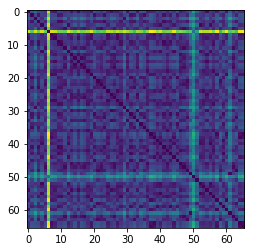

In [63]:
plt.imshow(D)

### Get Starts ins and outs by hour/place

In [84]:
# get $v_{start,i,t}$ in the form of a DF with times buckets as rows and stations as columns

starts = orderdf_s[orderdf_s['start']]
starts['time_bucket'] = starts['timestamp'].dt.round('5min')

/Users/ramoniglesias/development/cs341/venv/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [85]:
starts_table = pd.pivot_table(starts, index='time_bucket', 
               columns=['start_district_hash'], aggfunc=len, 
               values='order_id', fill_value=0)

### Get Pax Ins

In [86]:
# This should be pushed UP
orderdf_s['pax_arrival_time'] = orderdf_s['timestamp'] + orderdf_s['expected_travel_time'] * pd.Timedelta('1 minute')

In [87]:
# for cases where arrival estimate is infeasible , assume simply that it arrives exactly when the next rider departs
# there are ~697,519 cases of this happening, or ~8% of all trips

infeasible = (orderdf_s['pax_arrival_time'] > orderdf_s['next_timestamp']) & ~orderdf_s['last_ride']
orderdf_s[infeasible]['pax_arrival_time'] = orderdf_s[infeasible]['next_timestamp']

/Users/ramoniglesias/development/cs341/venv/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [88]:
# get $v_{pax_{in},i,t}$ in the form of a DF with times buckets as rows and stations as columns

#temporary, will remove
orderdf_s['time_bucket'] = orderdf_s['pax_arrival_time'].dt.round('5min')

paxin_table = pd.pivot_table(orderdf_s, index='time_bucket', 
               columns=['dest_district_hash'], aggfunc=len, 
               values='order_id', fill_value=0)

### Get Reb Ins

In [104]:
# we need this function to estimate the tarvel time for rebalancing

def get_rebalancing_time(series):
    start_ix = stations.index(series['dest_district_hash'])
    end_ix = stations.index(series['next_start_district_hash'])
    travel_time = D[start_ix][end_ix]
    return travel_time

In [105]:
rebs = orderdf_s[orderdf_s['emptytrip'] & ~orderdf_s['break'] & ~orderdf_s['last_ride']]
rebs['reb_travel_time'] = rebs.apply(get_rebalancing_time, axis=1)

/Users/ramoniglesias/development/cs341/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [131]:
rebs['reb_arrival_time'] = rebs['pax_arrival_time'] + rebs['reb_travel_time'] * pd.Timedelta('1 minute')

/Users/ramoniglesias/development/cs341/venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
# get $v_{reb_{in},i,t}$ in the form of a DF with times buckets as rows and stations as columns

#temporary, will remove
rebs['time_bucket'] = rebs['reb_arrival_time'].dt.round('5min')

rebin_table = pd.pivot_table(rebs, index='time_bucket', 
               columns=['next_start_district_hash'], aggfunc=len, 
               values='order_id', fill_value=0)

/Users/ramoniglesias/development/cs341/venv/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Get Breaks

In [144]:
breaks = orderdf_s[orderdf_s['break']]

In [145]:
breaks['time_bucket'] = breaks['pax_arrival_time'].dt.round('5min')

/Users/ramoniglesias/development/cs341/venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [146]:
breaks_table = pd.pivot_table(breaks, index='time_bucket', 
               columns=['dest_district_hash'], aggfunc=len, 
               values='order_id', fill_value=0)

### Get Reb Outs

In [133]:
# get $v_{reb_{in},i,t}$ in the form of a DF with times buckets as rows and stations as columns

#temporary, will remove
rebs['time_bucket'] = rebs['pax_arrival_time'].dt.round('5min')

rebout_table = pd.pivot_table(rebs, index='time_bucket', 
               columns=['dest_district_hash'], aggfunc=len, 
               values='order_id', fill_value=0)

/Users/ramoniglesias/development/cs341/venv/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Get Pax Outs

In [134]:
# get $v_{pax_{in},i,t}$ in the form of a DF with times buckets as rows and stations as columns

#temporary, will remove
orderdf_s['time_bucket'] = orderdf_s['timestamp'].dt.round('5min')

paxout_table = pd.pivot_table(orderdf_s, index='time_bucket', 
               columns=['start_district_hash'], aggfunc=len, 
               values='order_id', fill_value=0)

In [147]:
print 'starts shape', starts_table.shape
print 'paxins shape', paxin_table.shape
print 'rebins shape', rebin_table.shape
print 'breaks shape', breaks_table.shape
print 'paxouts shape', paxout_table.shape
print 'rebouts shape', rebout_table.shape

starts shape (6651, 66)
paxins shape (7759, 66)
rebins shape (7657, 66)
breaks shape (7748, 66)
paxouts shape (6651, 66)
rebouts shape (7207, 66)


In [160]:
balance = starts_table + paxin_table + rebin_table - breaks_table - rebout_table

In [164]:
balance.max().max()

513.0